# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = query_url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | sangeorz-bai
City not found. Skipping...
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | west bay
Processing Record 9 of Set 1 | saratamata
City not found. Skipping...
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | were ilu
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | nova olimpia
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | mariental
Processing Record 18 of Set 1 | geidam
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 

Processing Record 36 of Set 4 | karratha
Processing Record 37 of Set 4 | mareeba
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | kourou
Processing Record 40 of Set 4 | ola
Processing Record 41 of Set 4 | tanjung selor
City not found. Skipping...
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | abepura
Processing Record 44 of Set 4 | inirida
Processing Record 45 of Set 4 | afaahiti
Processing Record 46 of Set 4 | buka
Processing Record 47 of Set 4 | antsiranana
Processing Record 48 of Set 4 | siwa oasis
Processing Record 49 of Set 4 | qurayyat
Processing Record 0 of Set 5 | east london
Processing Record 1 of Set 5 | chake chake
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | torghay
Processing Record 4 of Set 5 | yazykovo
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | hakha
Processing Record 7 of Set 5 | aasiaat
Processing Record 8 of Set 5 | baie-comeau
Processing Record 9 of Set 5 | uturoa
Pr

Processing Record 26 of Set 8 | hammerfest
Processing Record 27 of Set 8 | nolinsk
Processing Record 28 of Set 8 | hihifo
City not found. Skipping...
Processing Record 29 of Set 8 | mezhdurechenskiy
Processing Record 30 of Set 8 | sandnessjoen
Processing Record 31 of Set 8 | valenca
Processing Record 32 of Set 8 | elverum
Processing Record 33 of Set 8 | manggar
Processing Record 34 of Set 8 | jiuquan
Processing Record 35 of Set 8 | heroica caborca
Processing Record 36 of Set 8 | bloemhof
Processing Record 37 of Set 8 | hasaki
Processing Record 38 of Set 8 | hirara
Processing Record 39 of Set 8 | monroeville
Processing Record 40 of Set 8 | puerto aysen
Processing Record 41 of Set 8 | balabac
Processing Record 42 of Set 8 | al hazm
Processing Record 43 of Set 8 | byron bay
Processing Record 44 of Set 8 | new norfolk
Processing Record 45 of Set 8 | puerto armuelles
Processing Record 46 of Set 8 | chernyshevskiy
Processing Record 47 of Set 8 | pangody
Processing Record 48 of Set 8 | mitu
P

Processing Record 20 of Set 12 | vershino-darasunskiy
Processing Record 21 of Set 12 | flin flon
Processing Record 22 of Set 12 | tommot
Processing Record 23 of Set 12 | carlsbad
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | cannonvale
Processing Record 26 of Set 12 | yirol
City not found. Skipping...
Processing Record 27 of Set 12 | sim
Processing Record 28 of Set 12 | saint-joseph
Processing Record 29 of Set 12 | lobau
Processing Record 30 of Set 12 | rumbek
Processing Record 31 of Set 12 | east ballina
Processing Record 32 of Set 12 | an nuhud
Processing Record 33 of Set 12 | goundam
Processing Record 34 of Set 12 | yuzhno-kurilsk
Processing Record 35 of Set 12 | kyabe
Processing Record 36 of Set 12 | belebey
Processing Record 37 of Set 12 | jianguang
Processing Record 38 of Set 12 | oliva de la frontera
Processing Record 39 of Set 12 | figuig (centre)
Processing Record 40 of Set 12 | inarajan village
Processing Record 41 of Set 12 | lappeenranta
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,289.97,83,3,4.63,AO,1691775103
1,port-aux-francais,-49.3500,70.2167,276.23,75,22,17.43,TF,1691775103
2,utrik,11.2278,169.8474,301.63,75,20,8.14,MH,1691775103
3,dudinka,69.4058,86.1778,280.72,52,32,13.29,RU,1691775103
4,puerto natales,-51.7236,-72.4875,277.21,64,20,3.61,CL,1691775104


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,289.97,83,3,4.63,AO,1691775103
1,port-aux-francais,-49.3500,70.2167,276.23,75,22,17.43,TF,1691775103
2,utrik,11.2278,169.8474,301.63,75,20,8.14,MH,1691775103
3,dudinka,69.4058,86.1778,280.72,52,32,13.29,RU,1691775103
4,puerto natales,-51.7236,-72.4875,277.21,64,20,3.61,CL,1691775104


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

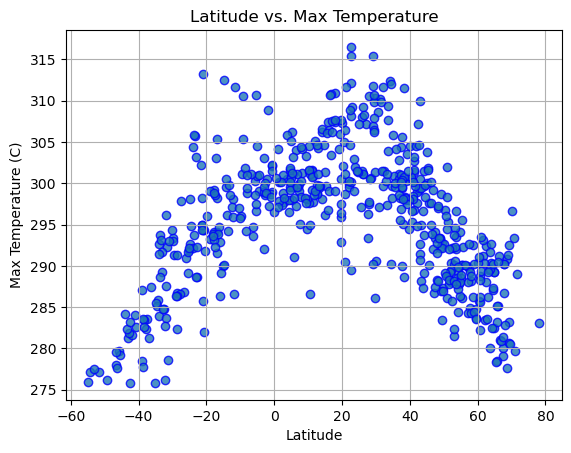

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
        city_data_df['Max Temp'],
        edgecolor='blue', linewidth= 1, marker='o',
        alpha=0.8, label='Cities')


# Incorporate the other graph properties
plt.title('Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

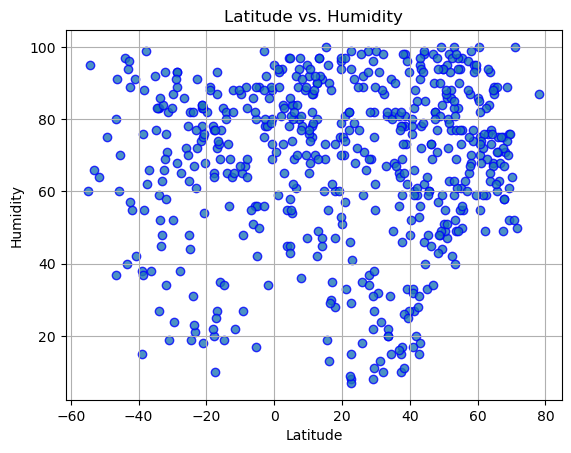

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
        city_data_df['Humidity'],
        edgecolor='blue', linewidth= 1, marker='o',
        alpha=0.8, label='Cities')


# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

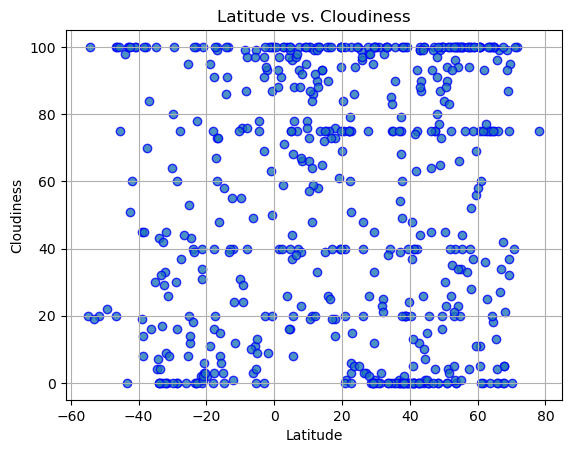

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
        city_data_df['Cloudiness'],
        edgecolor='blue', linewidth= 1, marker='o',
        alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

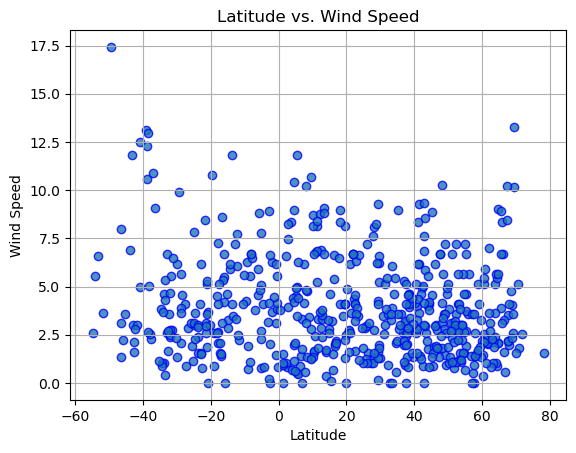

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
        city_data_df['Wind Speed'],
        edgecolor='blue', linewidth= 1, marker='o',
        alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linearregression(xvalues, yvalues):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(xvalues,yvalues)
    regressvalues=xvalues*slope+intercept
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regressvalues, "r-")
    print(f"the r squared value for the above relationship is:{rvalue*rvalue}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,utrik,11.2278,169.8474,301.63,75,20,8.14,MH,1691775103
3,dudinka,69.4058,86.1778,280.72,52,32,13.29,RU,1691775103
5,west bay,19.3667,-81.4167,305.93,75,40,4.12,KY,1691775104
6,klyuchi,52.2667,79.1667,288.07,77,100,2.74,RU,1691775104
7,ilulissat,69.2167,-51.1000,283.16,76,75,2.57,GL,1691775105


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,289.97,83,3,4.63,AO,1691775103
1,port-aux-francais,-49.3500,70.2167,276.23,75,22,17.43,TF,1691775103
4,puerto natales,-51.7236,-72.4875,277.21,64,20,3.61,CL,1691775104
9,adamstown,-25.0660,-130.1015,291.93,48,53,7.81,PN,1691775105
10,nova olimpia,-14.7972,-57.2881,312.53,19,58,3.29,BR,1691775105


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.44991258051279215


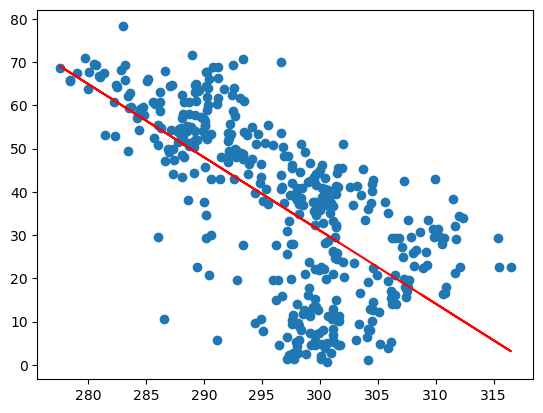

In [27]:
# Linear regression on Northern Hemisphere
plot_linearregression(northern_hemi_df["Max Temp"],northern_hemi_df["Lat"])


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.6183981224039098


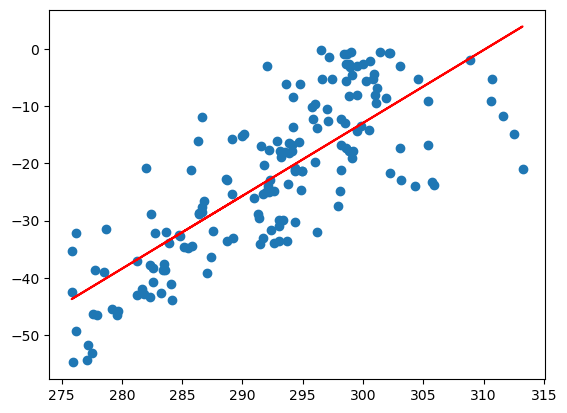

In [28]:
# Linear regression on Southern Hemisphere
plot_linearregression(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** We can see how the northen and southern hemispheres behave the opposite regarding temperature and latitude. For the northen hemisphere the higher the temperature, the latitude decreses (negative correlation). In the southern hemisphere while the temperature increses, so the latitude (positive correlation). The r square value shows that about 60% of the variation can be explained with this model for the southern hemisphere, while only about 45% in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.0006041686595746666


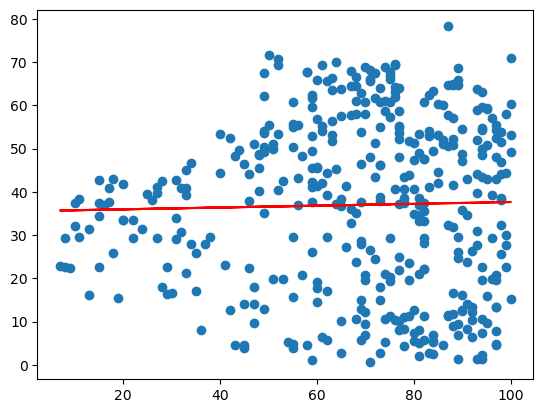

In [29]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df["Humidity"],northern_hemi_df["Lat"])

the r squared value for the above relationship is:0.0014386488905355323
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


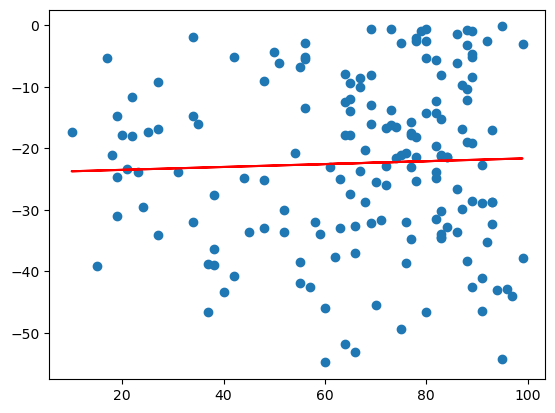

In [30]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df["Humidity"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** The r square values for humidity Vs Latitude for both hemispheres show a weak correlation.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.01099556935627346


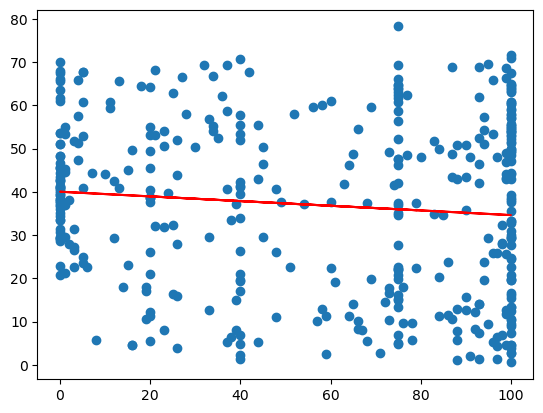

In [31]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df["Cloudiness"],northern_hemi_df["Lat"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.006651912014356066


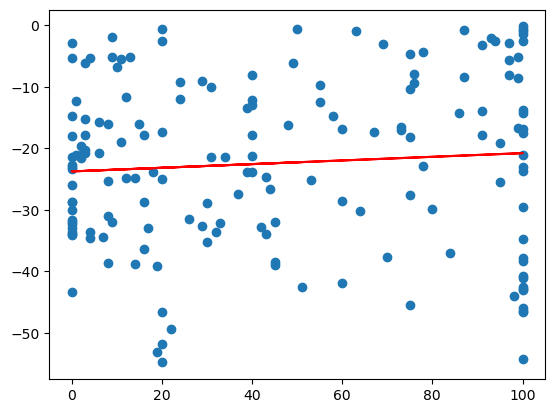

In [32]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df["Cloudiness"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** The r square values for Cloudiness Vs Latitude for both hemispheres show a weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.0059953439094460916


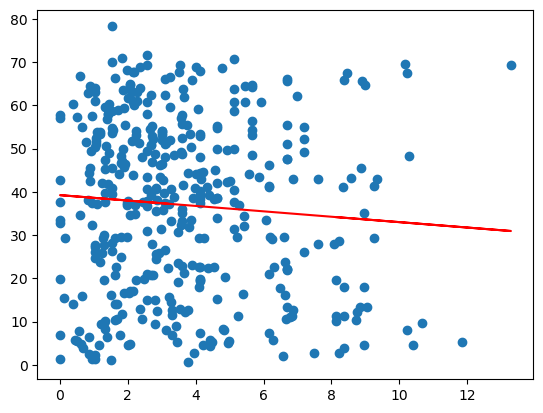

In [33]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df["Wind Speed"],northern_hemi_df["Lat"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
the r squared value for the above relationship is:0.01813469466487425


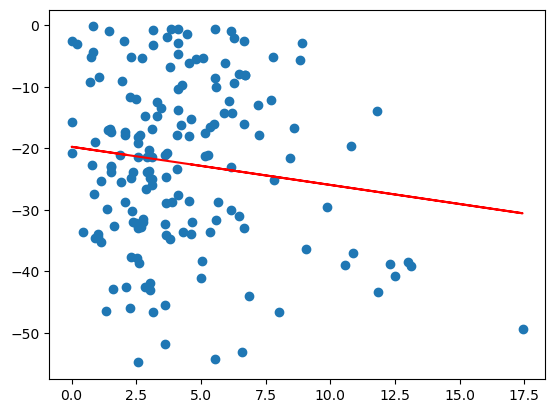

In [34]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df["Wind Speed"],southern_hemi_df["Lat"])

**Discussion about the linear relationship:** The r square values for wind speed Vs Latitude for both hemispheres show a week correlation.